# Simple Neural Network Model

Input: single principal component based on all 15 indicators 

Output: optimal max-shape portfolio with tight restrictions for the next period

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, Dropout, GRU, LSTM, Bidirectional
from keras.regularizers import L2

import os
os.chdir(os.path.expanduser('../'))

from helper_functions import train_and_evaluate_model, run_full_backtesting

In [2]:
os.chdir(os.path.expanduser('../data'))

from dotenv import load_dotenv
load_dotenv()

from DataProvider import DataProvider

In [3]:
data_provider = DataProvider()
x = data_provider.get_formatted_features()
y = data_provider.get_formatted_targets()
x_train, y_train, x_val, y_val, x_test, y_test = data_provider.train_train_split(x, y)

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


## Simple Dense Neural Network Model

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 162)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         2,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,067 (11.98 KB)

 Trainable params: 3,067 (11.98 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.9006 - val_loss: 2.6559 - learning_rate: 0.0010
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5816 - val_loss: 2.3583 - learning_rate: 0.0010
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2905 - val_loss: 2.0882 - learning_rate: 0.0010
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0267 - val_loss: 1.8446 - learning_rate: 0.0010
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7889 - val_loss: 1.6261 - learning_rate: 0.0010
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5761 - val_loss: 1.4310 - learning_rate: 0.0010
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3862 - val_loss: 1.2573 - learning_rate: 0.0010
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2171 - val_loss: 1.1029 - learning_rate: 0.0010
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0669 - val_loss: 0.9660 - learning_rate: 0.0010
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━

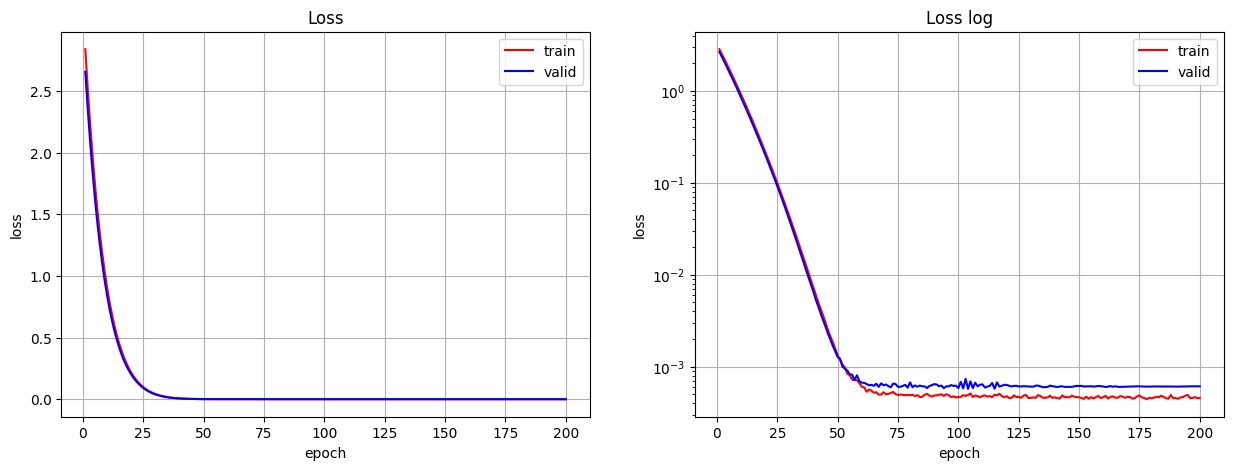

In [4]:
model_dnn = Sequential((
    Flatten(input_shape=x_train.shape[1:]),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_dnn, x_train, y_train,
                         x_val, y_val, x_test, y_test)

In [5]:
predictions = model_dnn.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


In [6]:
predictions[0].round(3)

array([0.469, 0.08 , 0.086, 0.03 , 0.029, 0.032, 0.027, 0.024, 0.01 ,
       0.01 , 0.012, 0.014, 0.013, 0.01 , 0.012, 0.016, 0.009, 0.011,
       0.014, 0.008, 0.01 , 0.019, 0.011, 0.012, 0.011, 0.012, 0.009],
      dtype=float32)

In [7]:
y_test[0]

array([0.576, 0.046, 0.075, 0.023, 0.02 , 0.039, 0.017, 0.016, 0.007,
       0.008, 0.02 , 0.005, 0.02 , 0.02 , 0.004, 0.002, 0.002, 0.002,
       0.024, 0.025, 0.02 , 0.012, 0.006, 0.003, 0.004, 0.002, 0.002])

## Convolutional Neural Network Model

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 4, 32)          │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,147 (20.11 KB)

 Trainable params: 5,147 (20.11 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.0103 - val_loss: 7.3879 - learning_rate: 0.0010
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.1986 - val_loss: 6.6264 - learning_rate: 0.0010
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.4530 - val_loss: 5.9299 - learning_rate: 0.0010
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.7715 - val_loss: 5.2966 - learning_rate: 0.0010
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.1535 - val_loss: 4.7234 - learning_rate: 0.0010
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.5942 - val_loss: 4.2053 - learning_rate: 0.0010
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0899 - val_loss: 3.7387 - learning_rate: 0.0010
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6364 - val_loss: 3.3208 - learning_rate: 0.0010
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2300 - val_loss: 2.9467 - learning_rate: 0.0010
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━

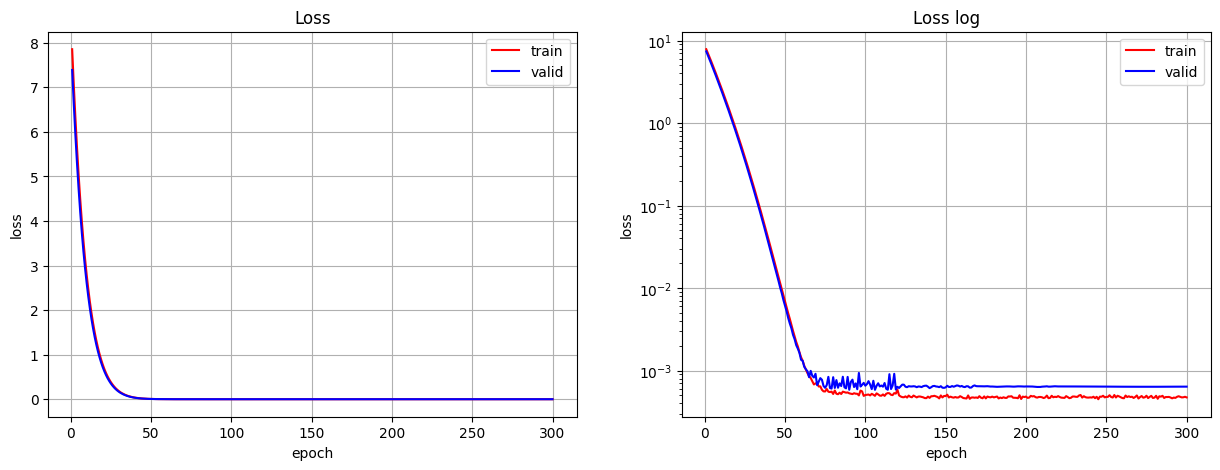

In [8]:
model_cnn = Sequential((
    Conv1D(32, 3, input_shape=x_train.shape[1:]),
    Flatten(),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=L2(0.3)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_cnn, x_train, y_train,
                         x_val, y_val, x_test, y_test, 
                         epochs=300)

## Model with GRU

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 32)             │         5,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,843 (26.73 KB)

 Trainable params: 6,843 (26.73 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 2.1268 - val_loss: 2.0339 - learning_rate: 0.0010
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0034 - val_loss: 1.9142 - learning_rate: 0.0010
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8854 - val_loss: 1.8000 - learning_rate: 0.0010
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7733 - val_loss: 1.6914 - learning_rate: 0.0010
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6666 - val_loss: 1.5886 - learning_rate: 0.0010
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5657 - val_loss: 1.4919 - learning_rate: 0.0010
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4710 - val_loss: 1.4011 - learning_rate: 0.0010
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3815 - val_loss: 1.3156 - learning_rate: 0.0010
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2969 - val_loss: 1.2349 - learning_rate: 0.0010
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━

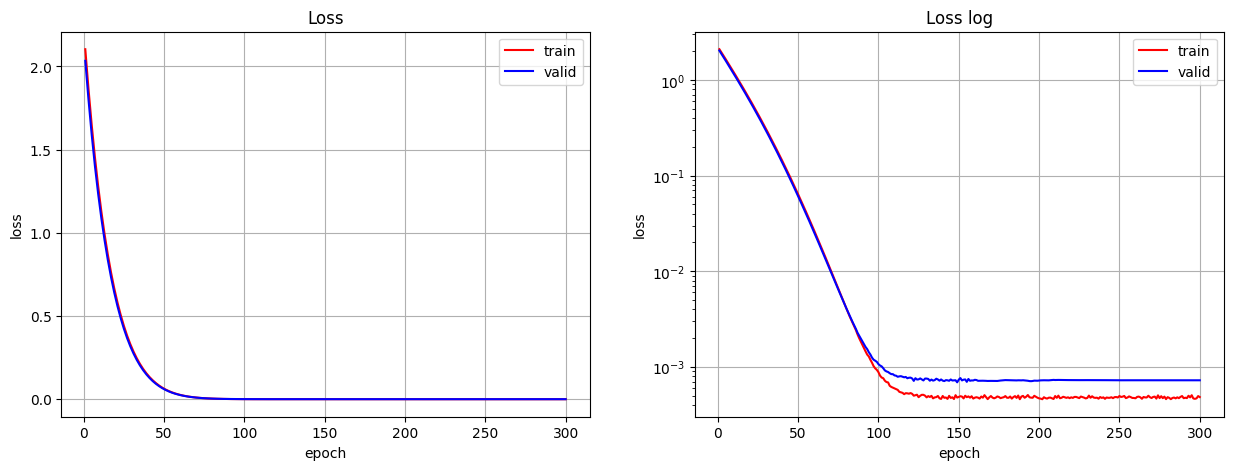

In [9]:
dropout = 0.1

model_gru = Sequential((
    GRU(32, input_shape=x_train.shape[1:],
         dropout=dropout, recurrent_dropout=dropout),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_gru, x_train, y_train,
                         x_val, y_val, x_test, y_test, 
                         epochs=300)

## Model with LSTM

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         7,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,667 (33.86 KB)

 Trainable params: 8,667 (33.86 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.0256 - val_loss: 1.9352 - learning_rate: 0.0010
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9049 - val_loss: 1.8184 - learning_rate: 0.0010
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7892 - val_loss: 1.7071 - learning_rate: 0.0010
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6792 - val_loss: 1.6012 - learning_rate: 0.0010
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5749 - val_loss: 1.5006 - learning_rate: 0.0010
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4764 - val_loss: 1.4057 - learning_rate: 0.0010
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3839 - val_loss: 1.3168 - learning_rate: 0.0010
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2970 - val_loss: 1.2337 - learning_rate: 0.0010
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2154 - val_loss: 1.1558 - learning_rate: 0.0010
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━

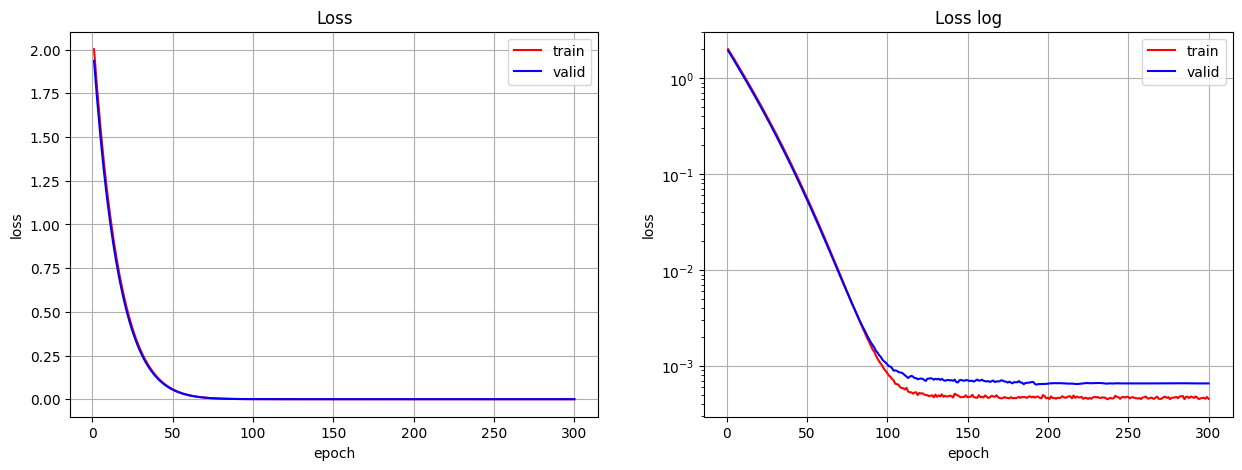

In [10]:
dropout = 0.1

model_lstm = Sequential((
    LSTM(32, input_shape=x_train.shape[1:],
         dropout=dropout, recurrent_dropout=dropout),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_lstm, x_train, y_train,
                         x_val, y_val, x_test, y_test, 
                         epochs=300)

## Model Bidireccional

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 6, 32)          │         4,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │         3,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,867 (30.73 KB)

 Trainable params: 7,867 (30.73 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 2.8322 - val_loss: 2.5728 - learning_rate: 0.0010
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4932 - val_loss: 2.2580 - learning_rate: 0.0010
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1859 - val_loss: 1.9750 - learning_rate: 0.0010
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9103 - val_loss: 1.7227 - learning_rate: 0.0010
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6646 - val_loss: 1.4989 - learning_rate: 0.0010
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4474 - val_loss: 1.3013 - learning_rate: 0.0010
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2557 - val_loss: 1.1273 - learning_rate: 0.0010
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0869 - val_loss: 0.9743 - learning_rate: 0.0010
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9385 - val_loss: 0.8398 - learning_rate: 0.0010
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━

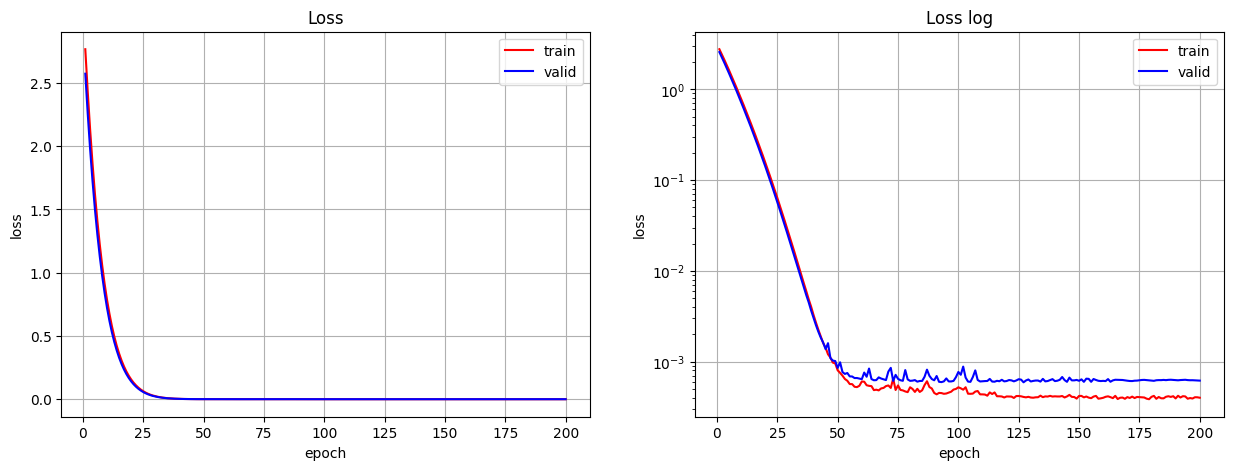

In [11]:
forward_layer = GRU(16, return_sequences=True)
backward_layer = GRU(16, activation='relu',
                     return_sequences=True,
                     go_backwards=True)

model_bidirectional = Sequential((
    Bidirectional(layer=forward_layer,
                  backward_layer=backward_layer,
                  input_shape=x_train.shape[1:]),
    Flatten(),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_bidirectional, 
                         x_train, y_train,
                         x_val, y_val, x_test, y_test)

## Backtesting

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/stepWARNING:tensorflow:6 out of the last 8 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000015F8D09E340> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


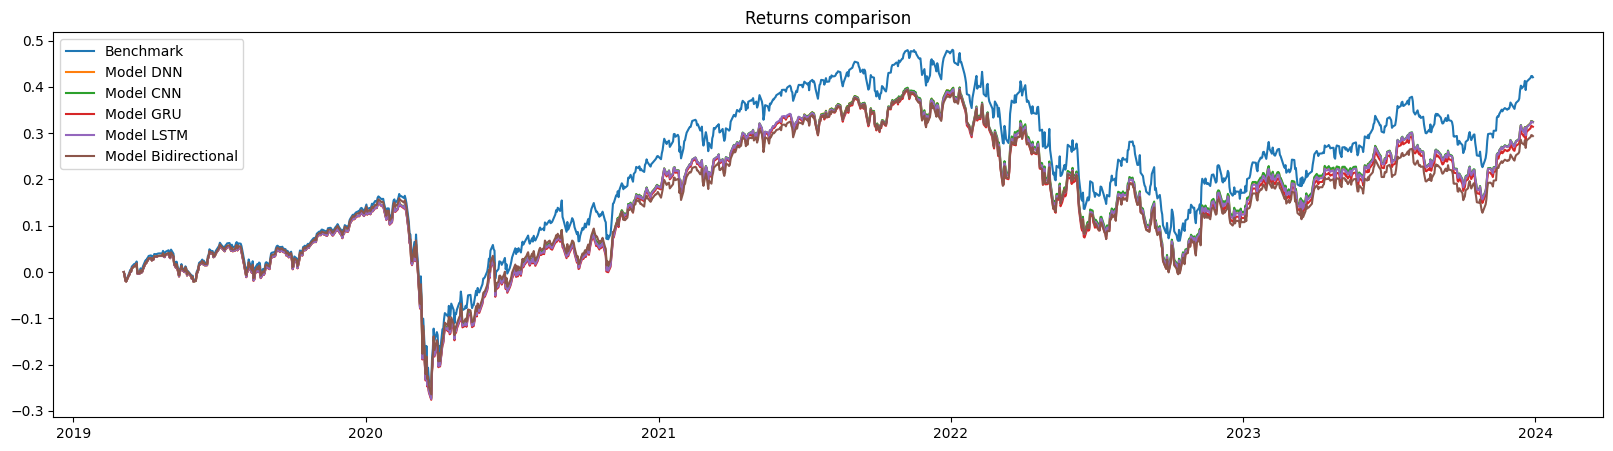

,Annual Returns,Annual Volatility,Sharpe Ratio,Sortino Ratio,Max Drawdown,Max Time Under Water,Calmar Ratio,Information Ratio
Benchmark,0.076754,0.203326,0.377494,0.442047,-0.354829,500.0,0.216313,0
Model DNN,0.060691,0.201609,0.301035,0.348476,-0.368501,493.0,0.164698,-0.593229
Model CNN,0.06072,0.200753,0.302462,0.350358,-0.367173,493.0,0.165372,-0.600031
Model GRU,0.058945,0.20195,0.291879,0.337129,-0.370199,493.0,0.159225,-0.633157
Model LSTM,0.060531,0.201827,0.299917,0.346916,-0.369033,493.0,0.164027,-0.590983
Model Bidirectional,0.055556,0.201241,0.276068,0.321207,-0.365434,538.0,0.152029,-0.734639


In [12]:
models = {
    'Model DNN': (model_dnn, x_test),
    'Model CNN': (model_cnn, x_test),
    'Model GRU': (model_gru, x_test),
    'Model LSTM': (model_lstm, x_test),
    'Model Bidirectional': (model_bidirectional, x_test)
}

df_results = run_full_backtesting(data_provider, models)
df_results